In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df.describe(include='all')

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


### clean up columns with "?" in them

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
df[df['ca']=='?'].index.values

array([166, 192, 287, 302])

In [11]:
df[df['thal']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [12]:
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values)

We can drop the rows with "?" because we don't have many observations with this problem.
However, if you have many observations, you will need to convert to NaN and replace / fillna. Example below:

In [18]:
new_df = df[df['thal']=='?']

In [20]:
new_df['ca'] = np.nan

/var/folders/75/tr_v06ms4k7gy38vcppxbcf80000gn/T/ipykernel_6744/560335259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ca'] = np.nan


In [21]:
new_df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,NaN,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,NaN,?,2


In [16]:
df.loc[[87,266]]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


Otherwise, we can continue with the dropping of these rows

In [22]:
df.drop(to_drop, axis=0, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


### convert 'ca' and 'thal' into numeric variables

In [24]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


## Data exploration - continuous variables

<Axes: xlabel='hd', ylabel='thalach'>

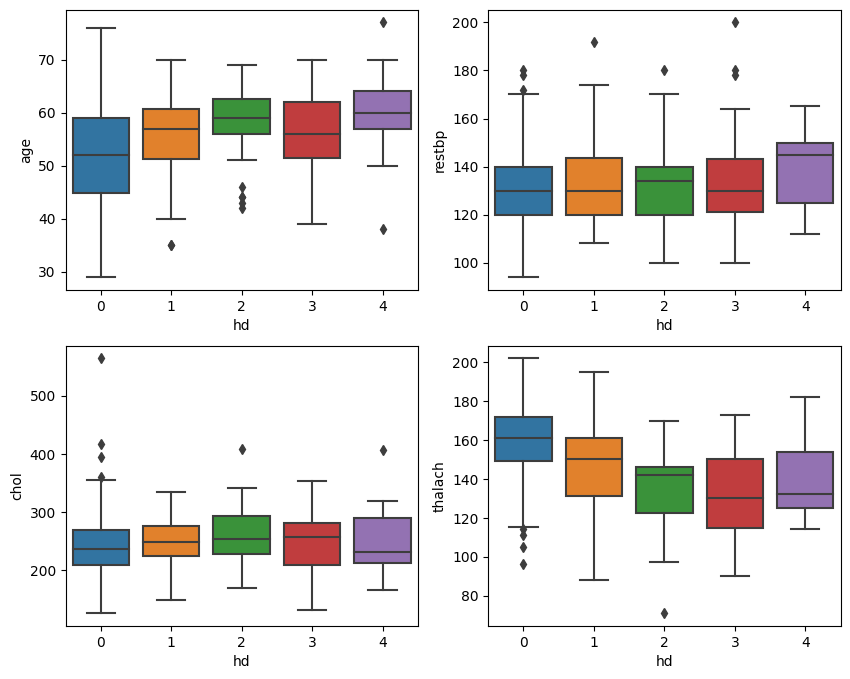

In [26]:
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd',y='age', data=df, ax=ax1)
sns.boxplot(x='hd',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd',y='thalach', data=df, ax=ax4)

## Check the categorical variables

In [27]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [28]:
# map 1-4 to type = 1

mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['hd_cons'] = df['hd'].map(mapping)

In [29]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_cons
hd,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [30]:
df.groupby('hd_cons').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
hd_cons,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='hd_cons', ylabel='thalach'>

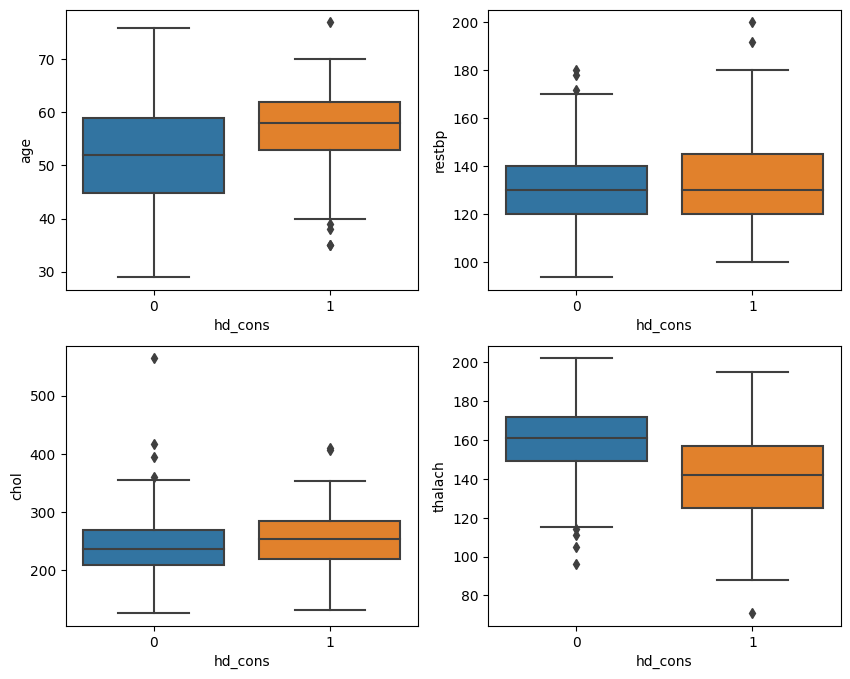

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd_cons',y='age', data=df, ax=ax1)
sns.boxplot(x='hd_cons',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd_cons',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd_cons',y='thalach', data=df, ax=ax4)

In [32]:
df.groupby(['hd','sex'])['thal'].count().unstack()

sex,0.0,1.0
hd,,
0,71,89
1,9,45
2,7,28
3,7,28
4,2,11


In [33]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [36]:
df.groupby(['hd_cons','cp'])['thal'].count().unstack()

cp,1.0,2.0,3.0,4.0
hd_cons,,,,
0,16,40,65,39
1,7,9,18,103


In [37]:
fbs = df.groupby(['hd_cons','fbs'])['thal'].count().unstack() # blood sugar may not be a great predictive variable

In [38]:
fbs

fbs,0.0,1.0
hd_cons,,
0,137,23
1,117,20


In [39]:
fbs['total'] = fbs[0.0] + fbs[1.0]

In [40]:
fbs[0.0]/fbs['total']

hd_cons
0    0.856250
1    0.854015
dtype: float64

In [41]:
fbs[1.0]/fbs['total']

hd_cons
0    0.143750
1    0.145985
dtype: float64

In [42]:
df.groupby(['hd_cons','restecg'])['thal'].count().unstack()

restecg,0.0,1.0,2.0
hd_cons,,,
0,92,1,67
1,55,3,79


In [43]:
df.groupby(['hd_cons','exang'])['thal'].count().unstack()

exang,0.0,1.0
hd_cons,,
0,137,23
1,63,74


In [44]:
df.groupby(['hd_cons','slope'])['thal'].count().unstack()

slope,1.0,2.0,3.0
hd_cons,,,
0,103,48,9
1,36,89,12


In [46]:
df.groupby(['hd_cons','ca'])['thal'].count().unstack()

ca,0.0,1.0,2.0,3.0
hd_cons,,,,
0,129,21,7,3
1,45,44,31,17


In [47]:
df.groupby(['hd_cons','thal'])['ca'].count().unstack()

thal,3.0,6.0,7.0
hd_cons,,,
0,127,6,27
1,37,12,88


<Axes: xlabel='hd_cons'>

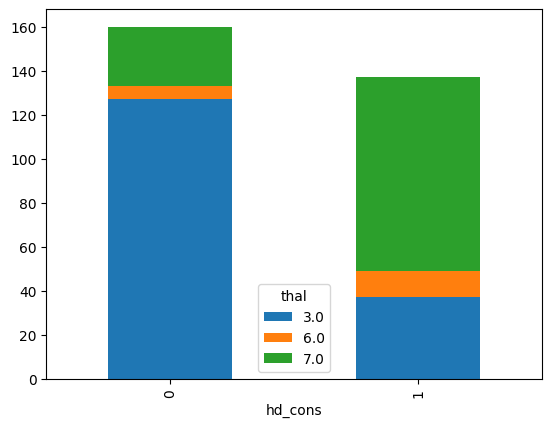

In [48]:
df.groupby(['hd_cons','thal'])['ca'].count().unstack().plot(kind='bar', stacked=True)

In [92]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [49]:
cat_columns = ['sex','cp','restecg','slope','ca','thal','exang','fbs']

In [51]:
X = df.iloc[:,:13]
Y = df.iloc[:, 13]

In [52]:
Y_v2 = df.iloc[:,14]

In [53]:
Y_v2

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd_cons, Length: 297, dtype: int64

In [54]:
Y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

In [55]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [56]:
X_encoded

,age,restbp,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, random_state=123)

In [58]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

[Text(0.5681818181818182, 0.9583333333333334, 'thal_3.0 <= 0.5\ngini = 0.644\nsamples = 222\nvalue = [120, 43, 24, 25, 10]\nclass = 0'),
 Text(0.29545454545454547, 0.875, 'cp_4.0 <= 0.5\ngini = 0.784\nsamples = 96\nvalue = [24, 23, 19, 21, 9]\nclass = 0'),
 Text(0.1259469696969697, 0.7916666666666666, 'oldpeak <= 2.4\ngini = 0.645\nsamples = 35\nvalue = [19, 6, 3, 5, 2]\nclass = 0'),
 Text(0.08143939393939394, 0.7083333333333334, 'thalach <= 126.0\ngini = 0.568\nsamples = 31\nvalue = [19, 6, 3, 3, 0]\nclass = 0'),
 Text(0.03787878787878788, 0.625, 'restbp <= 125.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0]\nclass = 2'),
 Text(0.022727272727272728, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]\nclass = 3'),
 Text(0.05303030303030303, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = 2'),
 Text(0.125, 0.625, 'restbp <= 176.0\ngini = 0.487\nsamples = 28\nvalue = [19, 6, 1, 2, 0]\nclass = 0'),
 Text(0.08333333333333333, 0.541666

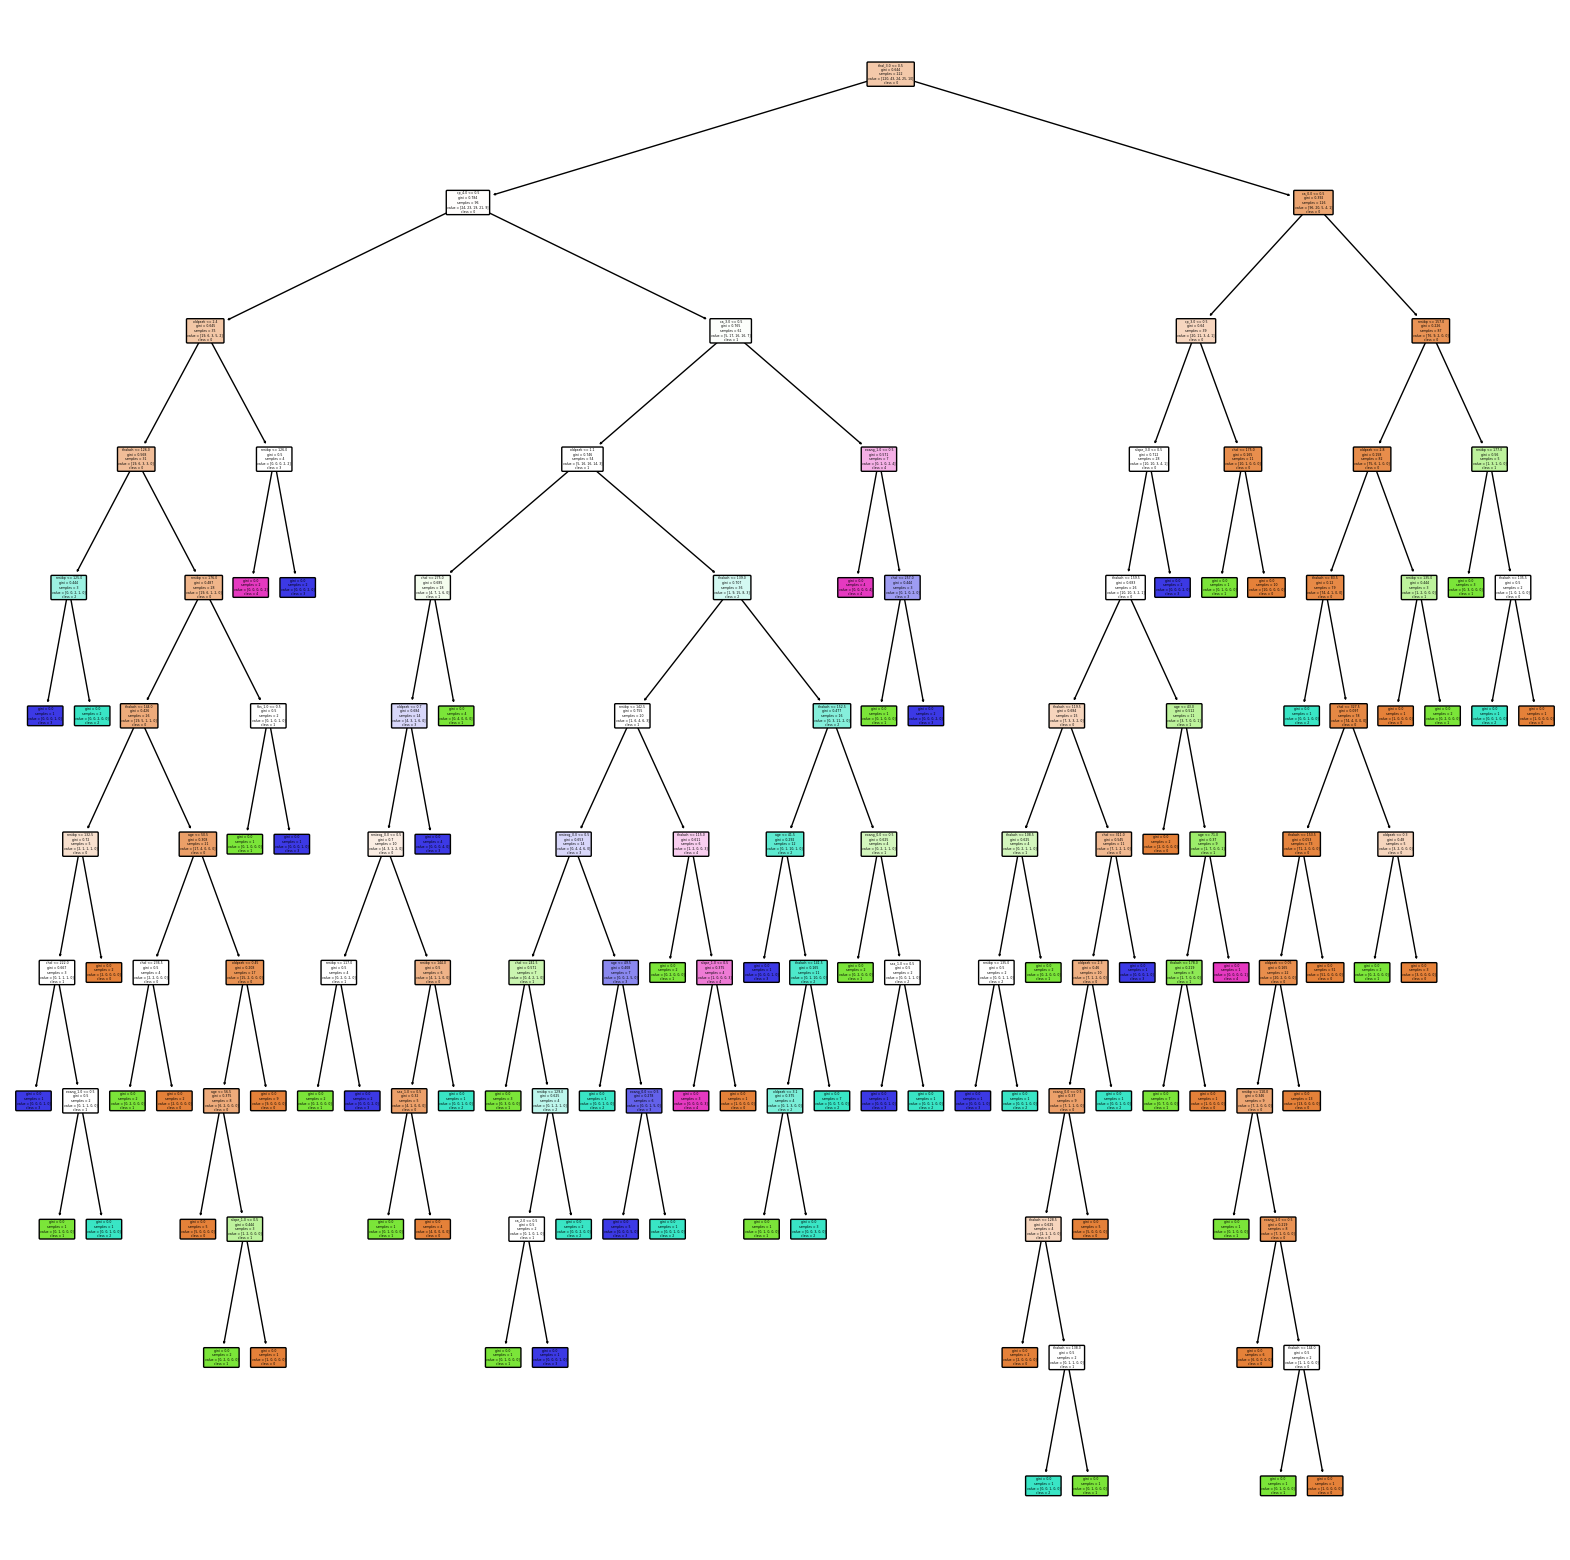

In [128]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);


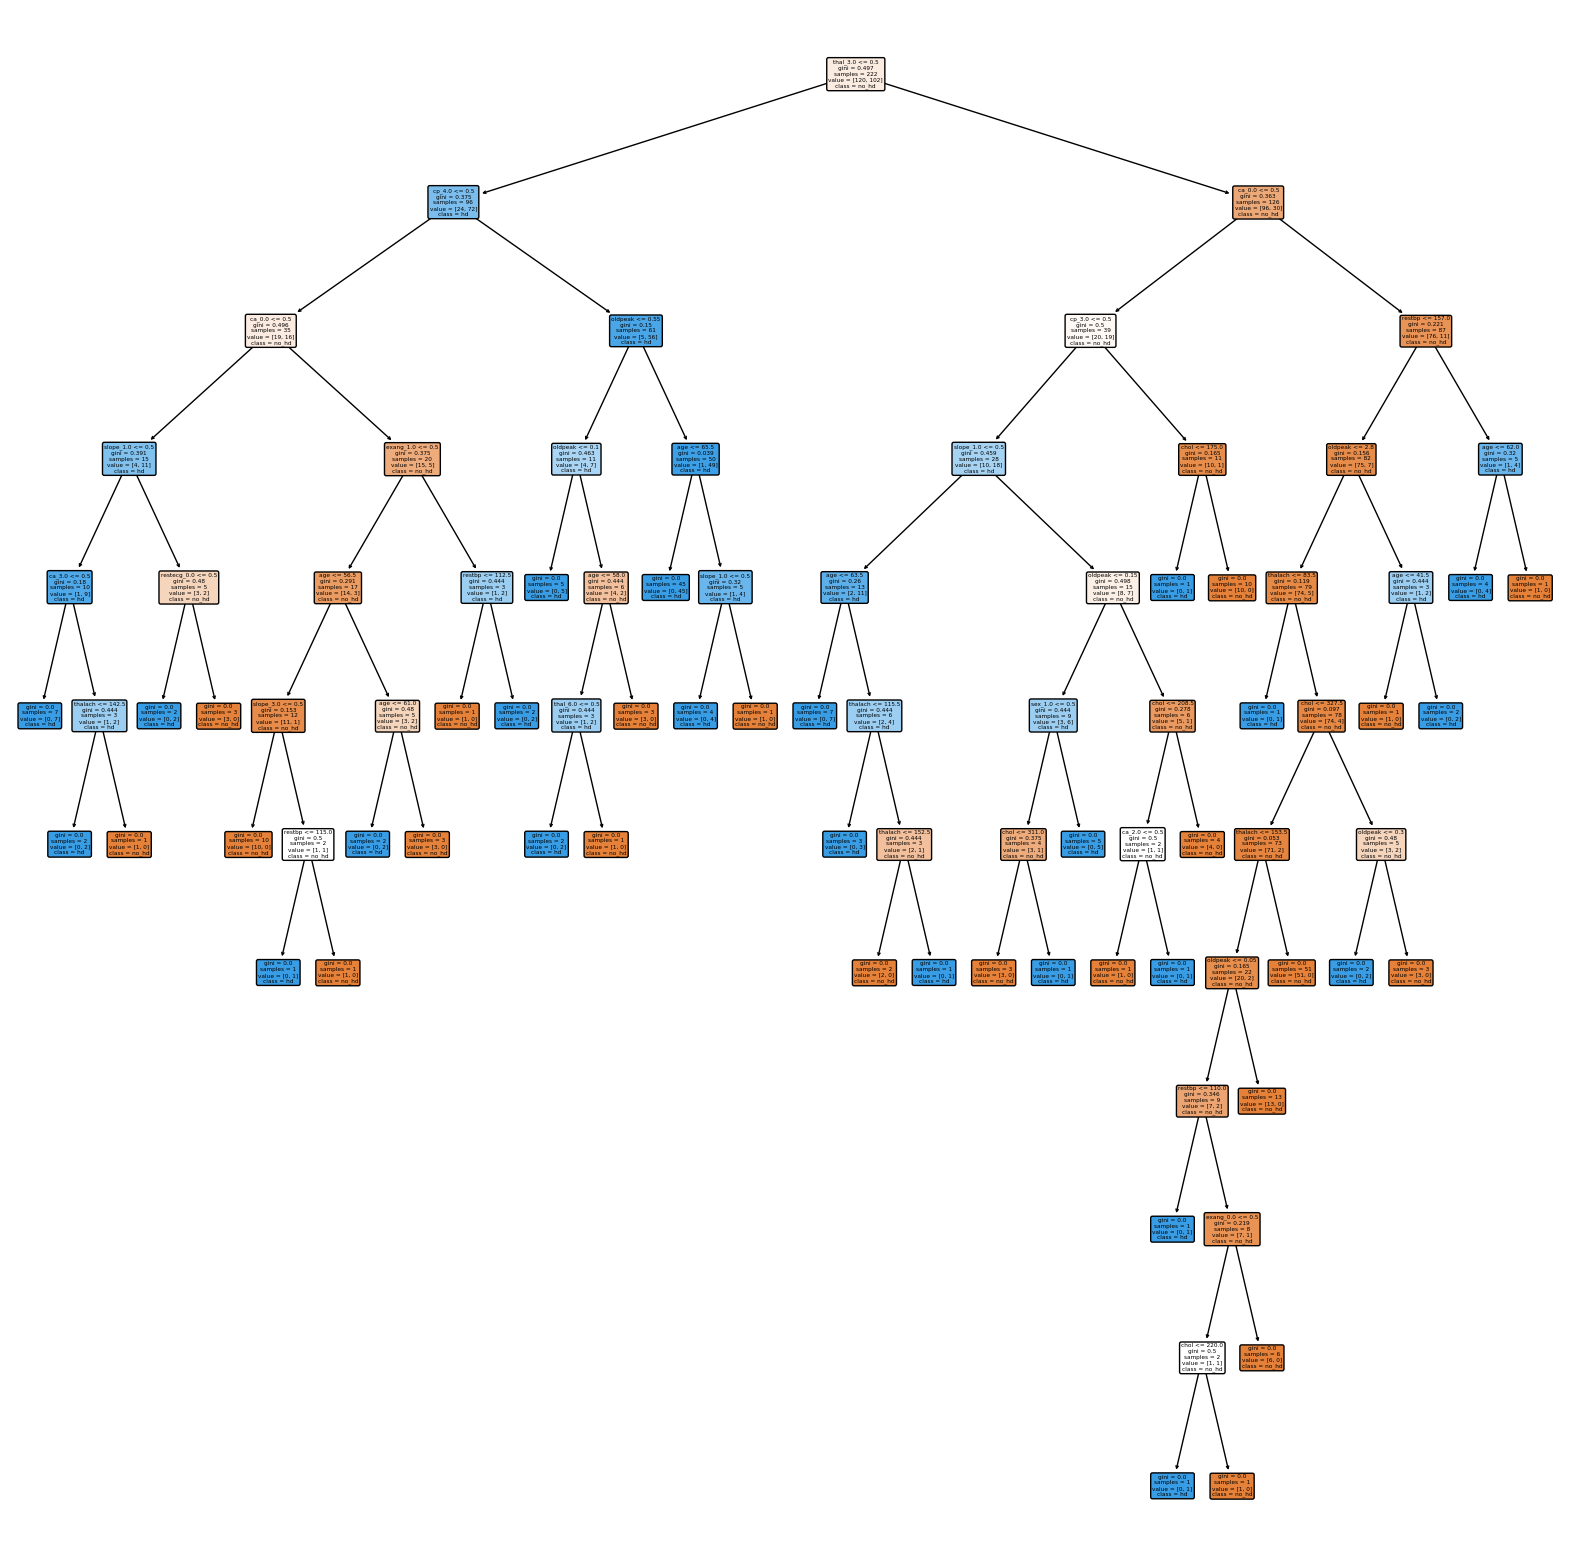

In [122]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(X_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);


In [123]:
predicted = dt.predict(X_test)

In [124]:
predicted

array([0, 4, 0, 0, 2, 3, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 0, 0, 1, 3,
       0, 1, 0, 3, 0, 0, 0, 1, 3, 4, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 2, 1, 0, 0, 3, 2, 2, 1, 0,
       3, 1, 0, 0, 2, 1, 0, 0, 3])

In [125]:
predicted_v2 = dt_v2.predict(X_test2)

In [126]:
print('v1_model: ', accuracy_score(predicted, y_test))
print('v2_model: ', accuracy_score(predicted_v2, y_test2))

v1_model:  0.49333333333333335
v2_model:  0.7733333333333333


In [127]:
predicted_train = dt.predict(X_train)
print(accuracy_score(predicted_train, y_train))

1.0


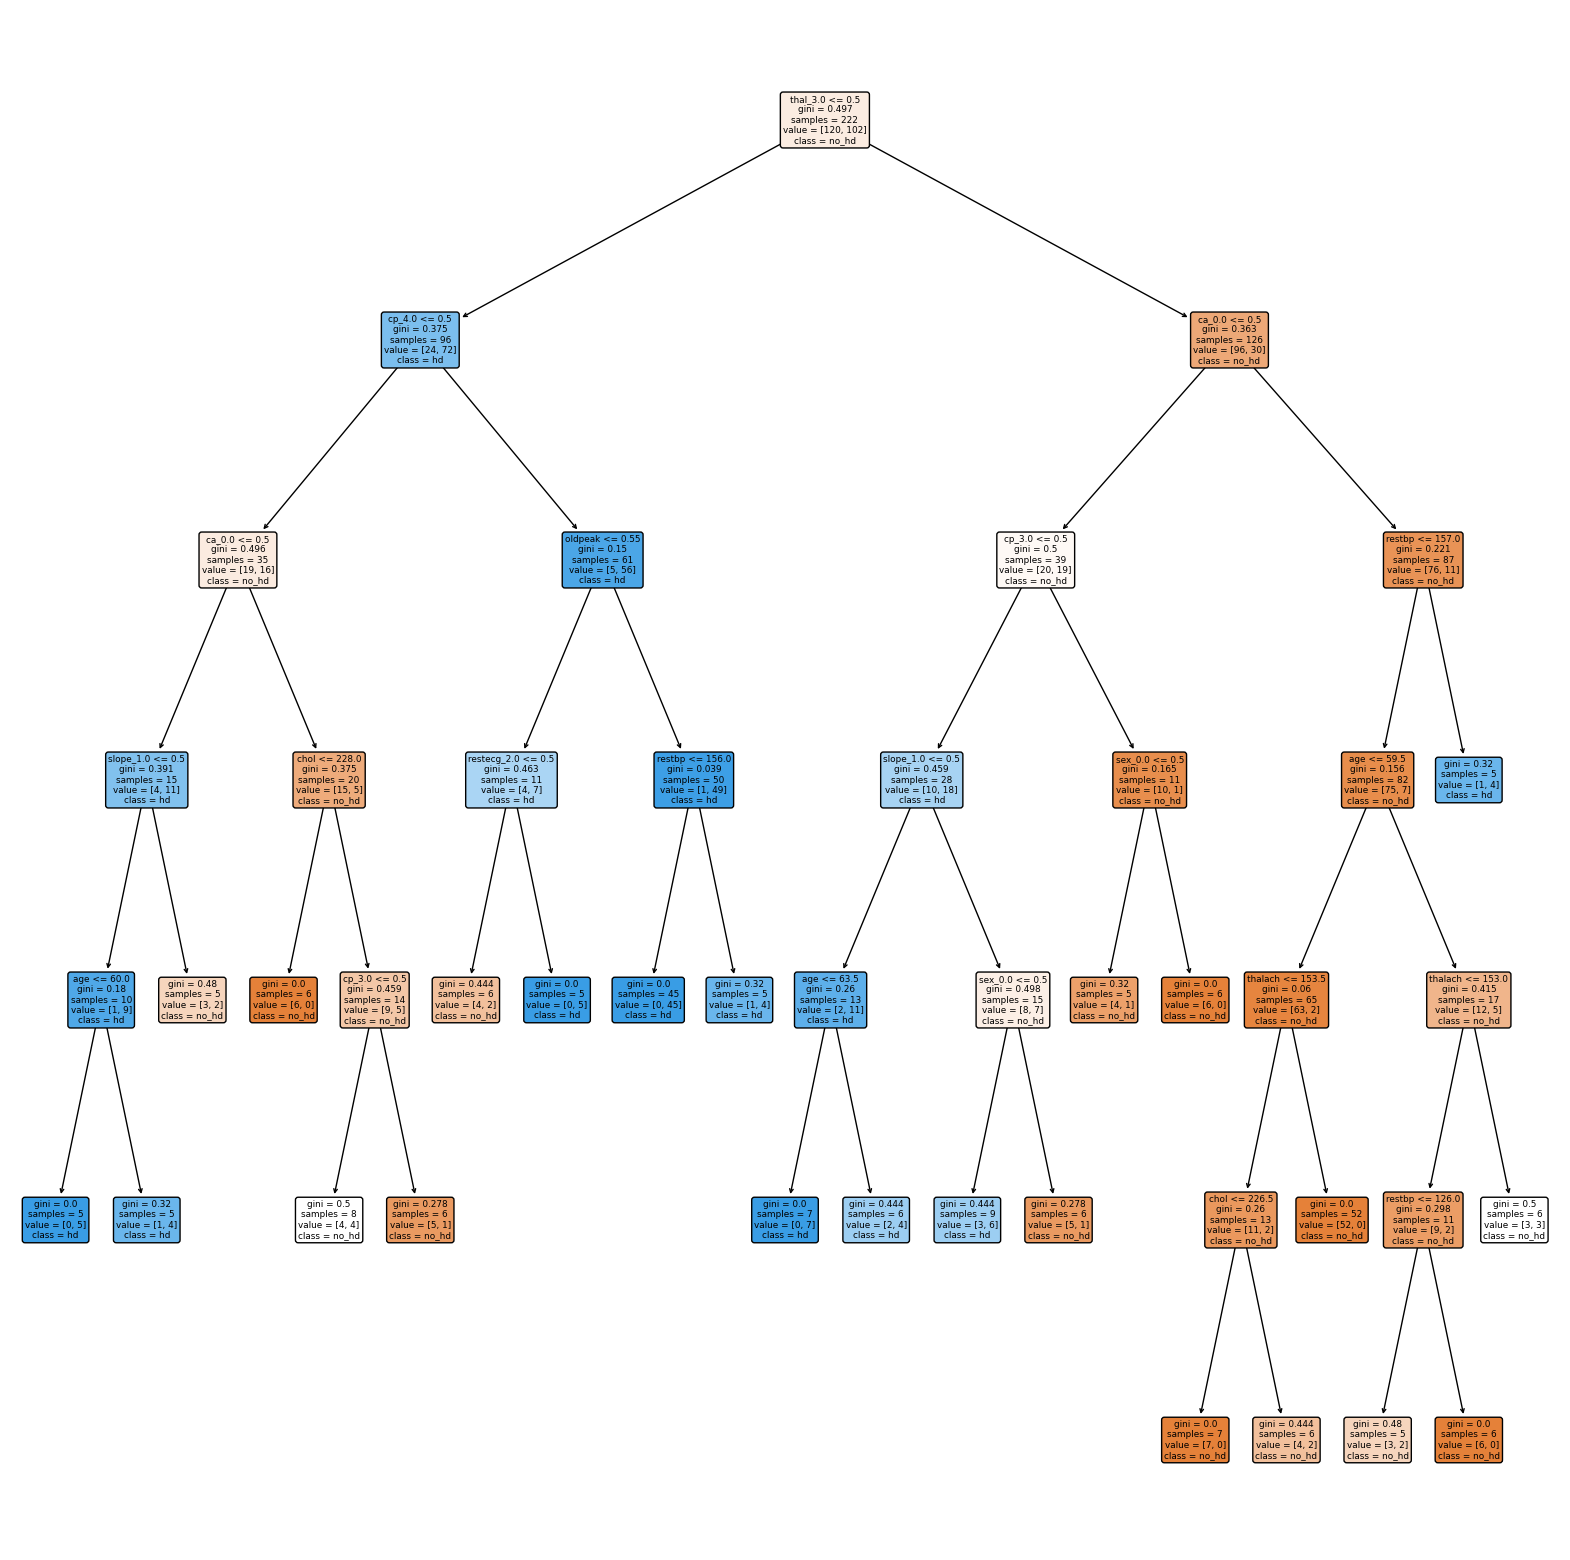

In [129]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth = 6, min_samples_leaf = 5)
dt_v3 = dt_v3.fit(X_train3, y_train3)
plt.figure(figsize=(20,20))
plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);


In [130]:
pred3 = dt_v3.predict(X_test3)

In [131]:
print(accuracy_score(pred3, y_test3))

0.8266666666666667


In [140]:
pred3_train = dt_v3.predict(X_train3)
print(accuracy_score(pred3_train, y_train3))

0.8828828828828829


In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train3, y_train3)
pred3_knn = knn.predict(X_test3)
print(accuracy_score(pred3_knn, y_test3))

0.64


In [141]:
X_encoded.columns

Index(['age', 'restbp', 'chol', 'thalach', 'oldpeak', 'sex_0.0', 'sex_1.0',
       'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0',
       'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0',
       'exang_0.0', 'exang_1.0', 'fbs_0.0', 'fbs_1.0'],
      dtype='object')